In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

saveFigs = False



In [16]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct
from scipy.stats import binom, poisson, norm


mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

#saveFigs = True
pathFigures = '/home/thea/MesterTesen/WrittenWork/Figures/'


import sys

sys.path.append('../../')
sys.path.append('../')

from GetCoreData_fct import GetCoreData
from BackDiffuse_LT import BackDiffuse
from Interpolation_Class import Interpolation
from HL_AnalyticThea_class import HL_Thea
from DiffusionProfiles_calculations import DiffusionLength
from transforms import transforms
from Decon import SpectralDecon
from sigmaSolver import sigma_Solver
from SignalAttenuation import Attenuation, AnnualLayerThick


def func_gaussian(x, N, mu, sigma, a):
    
    return N * norm.pdf(x, mu, sigma) + a

In [2]:
import sys 
import os
sys.path.append('../../')
sys.path.append('../')

from BackDiffuse_LT import BackDiffuse
from GetCoreData_fct import GetCoreData



from Interpolation_Class import Interpolation

from HL_AnalyticThea_class import HL_Thea
from DiffusionProfiles_calculations import DiffusionLength

from sigmaSolver import sigma_Solver




In [3]:
from transforms import transforms
from Decon import SpectralDecon

In [17]:
sites = ['B19','B22','B23','SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG', 'Crete']
N_InInts = [33, 33, 33, 33, 33, 33]
Nt_InInts = [33, 33, 33, 33, 33, 33]

j = 3

site = sites[j]
N_InInt = N_InInts[j]

N_InInt_test = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']
accum0 = CoreSpecs['Accum0']
accumIE = CoreSpecs['Accum1']
Temp0 = CoreSpecs['T0']

DataAll = GetCoreData(site, 'Alphabet') #'AWI_Bcores'

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth'][1:]
d18O = data_d18O['d18O'][1:]
depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']
dataAll = pd.DataFrame({'depth':depth_LT,'d18O':d18O_LT}, index=None)

depthECM = data_ECM['depth']
ECM = data_ECM['ECM']
depthECM_LT = data_ECM_LT['depth']
ECM_LT = data_ECM_LT['ECM']


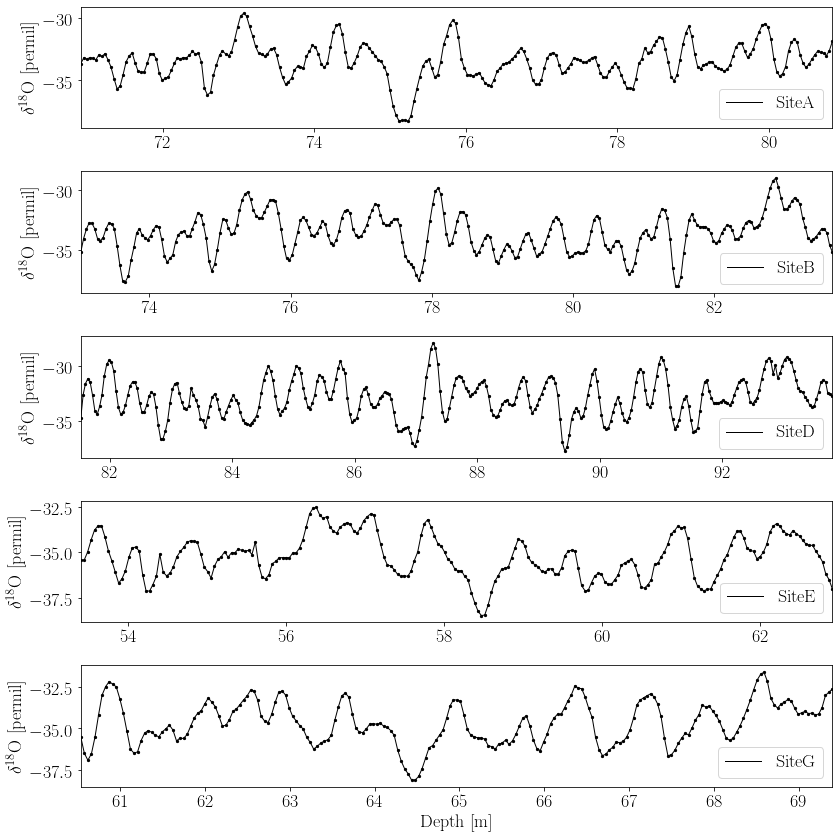

In [28]:
idxs = np.arange(3,len(sites)-1)
mpl.rcParams['font.size'] = 18

fig, axs = plt.subplots(len(idxs),1,figsize=(12,12))

for ax, i in zip(axs,idxs):
    j = i

    site = sites[j]

    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

    coreNames = CoresSpecs['CoreName']


    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    accum0 = CoreSpecs['Accum0']
    accumIE = CoreSpecs['Accum1']
    Temp0 = CoreSpecs['T0']

    DataAll = GetCoreData(site, 'Alphabet') #'AWI_Bcores'
    
    data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
    depth_LT = data_d18O_LT['depth']
    d18O_LT = data_d18O_LT['d18O']

    
    ax.plot(depth_LT,d18O_LT,lw=1,c='k',label=site)
    #ax.set_title('$\dot{b}_0=$'+f'{accum0:.3f} [m W.E.], '+'$T_0=$'+f'{Temp0} [C]', fontsize=18)
    ax.legend(loc='lower right')
    ax.scatter(depth_LT,d18O_LT,lw=1,c='k',s=5)
    ax.set(ylabel='$\delta^{18}$O [permil]',xlim=(min(depth_LT),max(depth_LT)))

axs[-1].set(xlabel='Depth [m]')
fig.tight_layout()

saveFigs=True
if saveFigs:
    fig.savefig('../../WrittenWork/Figures/'+'AllAlphabetCores_LT.png', bbox_inches='tight')

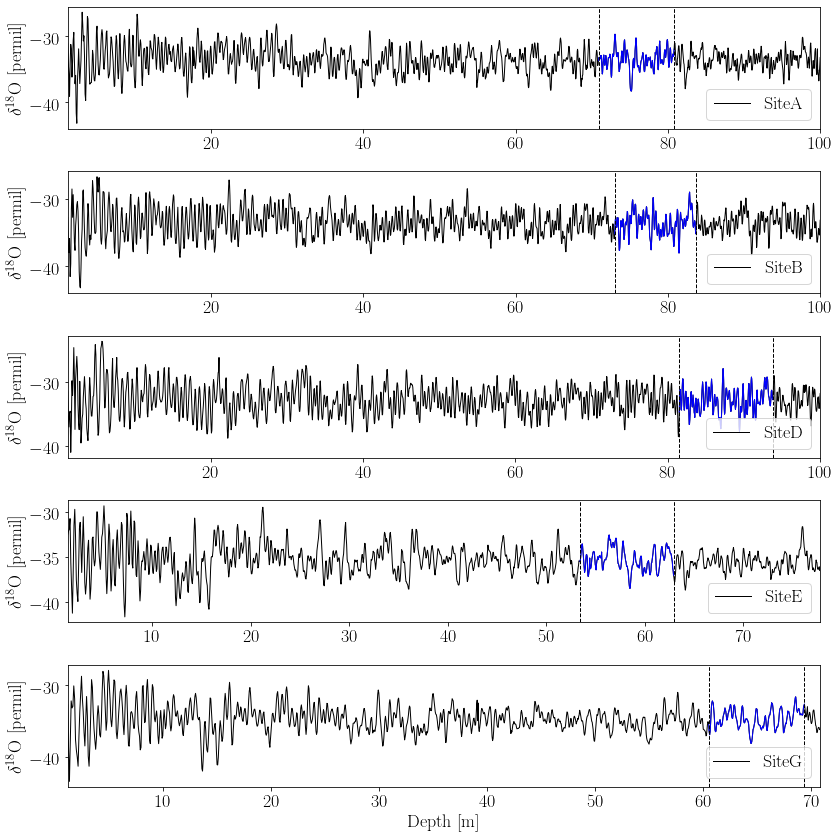

In [27]:
idxs = np.arange(3,len(sites)-1)
mpl.rcParams['font.size'] = 18

fig, axs = plt.subplots(len(idxs),1,figsize=(12,12))

for ax, i in zip(axs,idxs):
    j = i

    site = sites[j]
    
    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

    coreNames = CoresSpecs['CoreName']


    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    
    DataAll = GetCoreData(site, 'Alphabet') #'AWI_Bcores'

    data_d18O = DataAll[0]
    depth = data_d18O['depth']
    data = data_d18O['d18O']
    
    data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
    depth_LT = np.asarray(data_d18O_LT['depth'])
    data_LT = np.asarray(data_d18O_LT['d18O'])
    
    ax.plot(depth,data,lw=1,c='k', label=site)
    ax.legend(loc='lower right')
    ax.plot(depth_LT,data_LT,lw=1,c='b', label=site)
    ax.axvline(x=depth_LT[0],lw=1,ls='--',c='k')
    ax.axvline(x=depth_LT[-1],lw=1,ls='--',c='k')
    if max(depth) >= 100:
        ax.set(ylabel='$\delta^{18}$O [permil]', xlim=(min(depth),100))
    else:
        ax.set(ylabel='$\delta^{18}$O [permil]', xlim=(min(depth),max(depth)))
            
    
axs[-1].set(xlabel='Depth [m]')
fig.tight_layout()

if saveFigs:
    fig.savefig('../../WrittenWork/Figures/'+'AllAlphabetCores.png', bbox_inches='tight')

In [7]:
sites = ['B19','B22','B23','SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG', 'Crete']
N_InInts = [33, 33, 33, 33, 33, 33]
Nt_InInts = [33, 33, 33, 33, 33, 33]

j = 2

site = sites[j]
N_InInt = N_InInts[j]

N_InInt_test = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']
accum0 = CoreSpecs['Accum0']
accumIE = CoreSpecs['Accum1']
Temp0 = CoreSpecs['T0']

DataAll = GetCoreData(site, 'AWI_Bcores') #'Alphabet'

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth'][1:]
d18O = data_d18O['d18O'][1:]
depth_LT = np.asarray(data_d18O_LT['depth'])
d18O_LT = np.asarray(data_d18O_LT['d18O'])
dataAll = pd.DataFrame({'depth':depth_LT,'d18O':d18O_LT}, index=None)



No ECM file found, setting empty df instead


In [16]:
data_ECM = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/datasets/B_cores_AWI/BcoresECMDEP/DepthDEP__Clean__B23.txt', '\t')

depthECM = np.asarray(data_ECM['depth'])
ECM = np.asarray(data_ECM['cond'])

depthECM_LT = depthECM[(depthECM >= dTamb) & (depthECM <= dLaki)]
ECM_LT = ECM[(depthECM >= dTamb) & (depthECM <= dLaki)]


In [19]:
d1 = dTamb - 0.7
d2 = dLaki + 0.7

depthECM_LTX = depthECM[(depthECM >= d1) & (depthECM <= d2)]
ECM_LTX = ECM[(depthECM >= d1) & (depthECM <= d2)]

    # Define d18O details data. Define btw. Laki and Tamb.
depth_LTX = data_d18O['depth'][(data_d18O['depth'] >= d1) & (data_d18O['depth'] <= d2)]
d18O_LTX = data_d18O['d18O'][(data_d18O['depth'] >= d1) & (data_d18O['depth'] <= d2)]


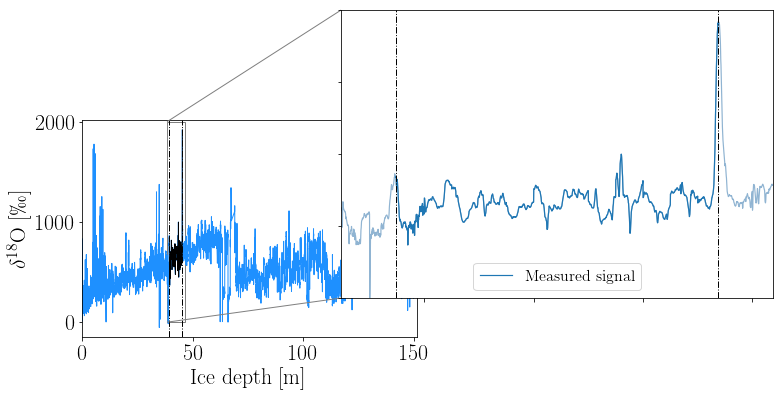

In [45]:
fig_ECM, ax_ECM = plt.subplots(figsize=(6,4))
plt.rcParams.update({'font.size': 22})

ax_ECM.plot(depthECM, ECM,'dodgerblue',lw=1)
ax_ECM.plot(depthECM_LT, ECM_LT,'k',lw=0.8)
ax_ECM.set(xlim=(depthECM.min(), depthECM.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')
ax_ECM.axvline(x=dTamb,color='k',lw=1, ls='-.')
ax_ECM.axvline(x=dLaki,color='k',lw=1, ls='-.')

x1 = depthECM_LT.min()-1
x2 = depthECM_LT.max()+1
y1 = 0
y2 = 2000

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

axins = inset_axes(ax_ECM, 6,4, loc=2, bbox_to_anchor=(0.7,0.3,1,1), bbox_transform=ax_ECM.figure.transFigure)#loc=5) # zoom = 2


axins.plot(depthECM_LT, ECM_LT, label='Measured signal', lw=1.2, zorder=1)
axins.legend(fontsize=16)

axins.plot(depthECM[(depthECM > dTamb - 1) & (depthECM < dLaki + 1)], ECM[(depthECM > dTamb - 1) & (depthECM < dLaki + 1)], lw=1.2, alpha = 0.6, color='steelblue', zorder=-1)
axins.axvline(x=dTamb,color='k',lw=1, ls='-.')
axins.axvline(x=dLaki,color='k',lw=1, ls='-.')

#axins.plot(depth_LT_int, d18O_LT_int,color='k',lw=1, alpha=0.8, linestyle='--', label='Spline interp., $\Delta =$ '+f'{Delta:.3f}')

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax_ECM, axins, loc1=2, loc2=3, fc="none", ec="0.5")

#plt.draw()
#plt.show()
saveFigs=True
if saveFigs:
    fig_ECM.savefig('../../WrittenWork/Figures/' + site + '_ECMInsert.png', bbox_inches = 'tight')


In [18]:
saveFigs

True

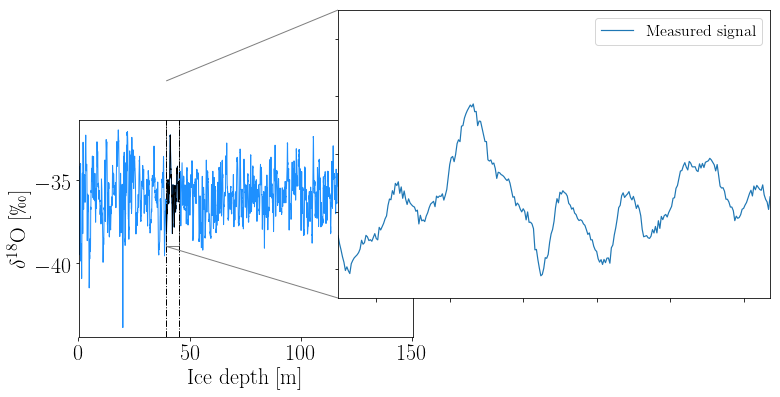

In [40]:
fig_Iso, ax_Iso = plt.subplots(figsize=(6,4))
plt.rcParams.update({'font.size': 22})

ax_Iso.plot(depth, d18O,'dodgerblue',lw=1)
ax_Iso.plot(depth_LT, d18O_LT,'k',lw=0.8)
ax_Iso.set(xlim=(depth.min(), depth.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')
ax_Iso.axvline(x=dTamb,color='k',lw=1, ls='-.')
ax_Iso.axvline(x=dLaki,color='k',lw=1, ls='-.')

x1 = depth_LT.min()
x2 = depth_LT.max()
y1 = -39
y2 = -29

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

axins = inset_axes(ax_Iso, 6,4, loc=2, bbox_to_anchor=(0.7,0.3,1,1), bbox_transform=ax_Iso.figure.transFigure)#loc=5) # zoom = 2
axins.plot(depth_LT, d18O_LT, label='Measured signal', lw=1.2)
#axins.plot(depth_LT_int, d18O_LT_int,color='k',lw=1, alpha=0.8, linestyle='--', label='Spline interp., $\Delta =$ '+f'{Delta:.3f}')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.legend(fontsize=16)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax_Iso, axins, loc1=2, loc2=3, fc="none", ec="0.5")

#plt.draw()
#plt.show()

if saveFigs:
    fig_Iso.savefig('../../WrittenWork/Figures/' + site + '_d18OInsert.png', bbox_inches = 'tight')


In [30]:
depth_LT = np.asarray(depth_LT)

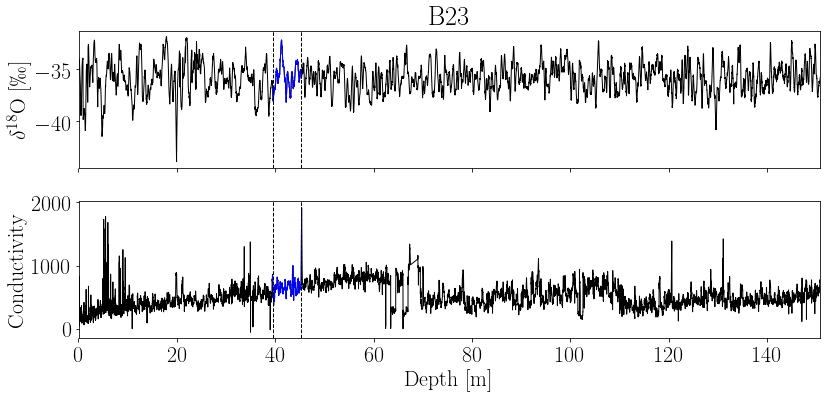

In [38]:
fig, ax = plt.subplots(2,1,figsize=(12,6), sharex=True)

ax[0].plot(depth,d18O,lw=1,c='k', label=site)
ax[1].plot(depthECM,ECM,lw=1,c='k', label=site)
#ax.legend(loc='lower right')
ax[0].plot(depth_LT,d18O_LT,lw=1,c='b', label=site)
ax[1].plot(depthECM_LT,ECM_LT,lw=1,c='b', label=site)
ax[0].axvline(x=depth_LT[0],lw=1,ls='--',c='k')
ax[0].axvline(x=depth_LT[-1],lw=1,ls='--',c='k')            
ax[1].axvline(x=depth_LT[0],lw=1,ls='--',c='k')
ax[1].axvline(x=depth_LT[-1],lw=1,ls='--',c='k')            

ax[0].set(ylabel='$\delta^{18}$O [\permil]', title=site)
ax[1].set(xlabel='Depth [m]', xlim=(min(depth),max(depth)), ylabel='Conductivity')
fig.tight_layout()

saveFigs=False
if saveFigs:
    fig.savefig('../../WrittenWork/Figures/' + site + '_ECM_d18O_full.eps', bbox_inches = 'tight')


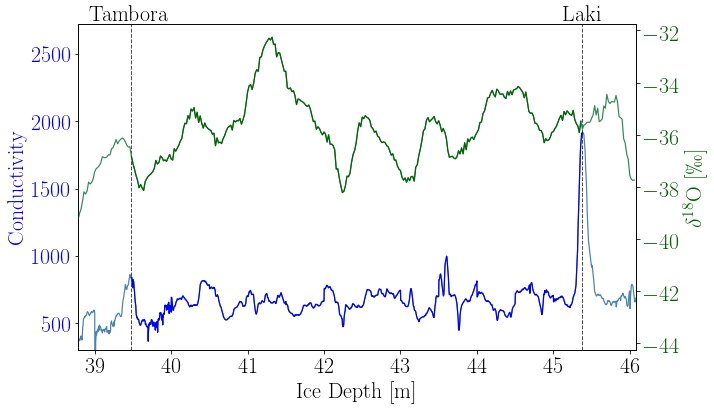

In [37]:
figDEP2, axDEP2 = plt.subplots(figsize=(10,6))
axDEP2.axvline(x=dTamb, color='k', ls='--', alpha=0.7, lw=1)
axDEP2.axvline(x=dLaki, color='k', ls='--', alpha=0.7, lw=1)
axDEP2.text(dTamb-0.55,max(ECM_LTX)+800+20, 'Tambora')
axDEP2.text(dLaki-0.25,max(ECM_LTX)+800+20, 'Laki')

axDEP2.set(ylim=(300,max(ECM_LTX)+800),xlim=(min(depthECM_LTX),max(depthECM_LTX)), xlabel='Ice Depth [m]')
axDEP2.set_ylabel('Conductivity', color='blue')
axDEP2.tick_params(axis='y', labelcolor='blue')
axDEP2.plot(depthECM_LTX, ECM_LTX, lw=1.2, color='steelblue')
axDEP2.plot(depthECM_LT, ECM_LT, lw=1.2, color='blue')


axDEP2_2 = axDEP2.twinx()

axDEP2_2.set(ylim=(min(d18O_LTX)-5,max(d18O_LTX)+.5))
axDEP2_2.set_ylabel('$\delta^{18}$O [\permil]', color='darkgreen')
axDEP2_2.tick_params(axis='y', labelcolor='darkgreen')
axDEP2_2.plot(depth_LTX, d18O_LTX, lw=1.2, color='seagreen')
axDEP2_2.plot(depth_LT,d18O_LT, lw=1.2, color='darkgreen')

saveFigs = True
if saveFigs:
    figDEP2.savefig('../../WrittenWork/Figures/' + site + '_ECMd18O_combo.png')

In [51]:
sites = ['B19','B22','B23','SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG', 'Crete']
N_InInts = [33, 33, 33, 33, 33, 33]
Nt_InInts = [33, 33, 33, 33, 33, 33]

j = 3

site = sites[j]
N_InInt = N_InInts[j]

N_InInt_test = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']
accum0 = CoreSpecs['Accum0']
accumIE = CoreSpecs['Accum1']
Temp0 = CoreSpecs['T0']

DataAll = GetCoreData(site, 'Alphabet') #'AWI_Bcores'

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth'][1:]
d18O = data_d18O['d18O'][1:]
depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']
dataAll = pd.DataFrame({'depth':depth_LT,'d18O':d18O_LT}, index=None)

depthECM = data_ECM['depth']
ECM = data_ECM['ECM']
depthECM_LT = data_ECM_LT['depth']
ECM_LT = data_ECM_LT['ECM']

d1 = dTamb - 0.7
d2 = dLaki + 0.7

depthECM_LTX = depthECM[(depthECM >= d1) & (depthECM <= d2)]
ECM_LTX = ECM[(depthECM >= d1) & (depthECM <= d2)]

    # Define d18O details data. Define btw. Laki and Tamb.
depth_LTX = data_d18O['depth'][(data_d18O['depth'] >= d1) & (data_d18O['depth'] <= d2)]
d18O_LTX = data_d18O['d18O'][(data_d18O['depth'] >= d1) & (data_d18O['depth'] <= d2)]


In [11]:
d_mean = np.mean(np.diff(depth_LT))
d_std = np.std(np.diff(depth_LT)) 

print(f'Ave. sample size: {d_mean*100:.2f} +/- {d_std*100:.2f} [cm]')

Ave. sample size: 2.68 +/- 0.05 [cm]


In [12]:
inst32 = BackDiffuse(site, data_d18O_LT, CoresSpecs, dTamb, dLaki, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT, transType='NDCT')

depthOpt32, dataOpt32, diffLen32, peaks32, arr_DiffLens32, arr_Npeaks32, arr_depth32, arr_data32 = inst32.backDiffused(theoDiffLen=True,print_Npeaks=False, diffLenStart_In=0.005, diffLenEnd_In=0.15, interpAfterDecon=True)

Sigma fit: 6.01
Min sigma analyt: 7.69
Starting sigma: 4.01 [cm]
100. Npeaks: 13, diffLen: 5.017 cm
200. Npeaks: 20, diffLen: 6.022 cm
300. Npeaks: 24, diffLen: 7.027 cm
400. Npeaks: 32, diffLen: 8.032 cm
500. Npeaks: 33, diffLen: 8.055 cm
Final sigma: 8.04 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.013


In [13]:
inst_test = BackDiffuse(site, data_d18O_LT, CoresSpecs, dTamb, dLaki, N_InInt_test, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT)

depthOpt_test, dataOpt_test, diffLen_test, peaks_test, arr_DiffLens_test, arr_Npeaks_test, arr_depth_test, arr_data_test = inst_test.backDiffused(theoDiffLen=True,print_Npeaks=False, diffLenStart_In=0.005, diffLenEnd_In=0.15, interpAfterDecon=True)

Sigma fit: 5.92
Min sigma analyt: 7.69
Starting sigma: 3.92 [cm]
100. Npeaks: 16, diffLen: 4.926 cm
200. Npeaks: 24, diffLen: 5.931 cm
300. Npeaks: 27, diffLen: 6.936 cm
Final sigma: 7.86 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.013


In [14]:
dataMin, peaksMin, N_peaksMin, troughsMin, N_troughsMin, diffLenTheoMin, dataMax, peaksMax, N_peaksMax, troughsMax, N_troughsMax, diffLenTheoMax = inst_test.BackDiffuse_Theo()

depth0 = dataMin['depth']
data0 = dataMin['d18O']
depth1 = dataMax['depth']
data1 = dataMax['d18O']

diffLenFit_in = 9.04/100
dataAllFit, peaksFit, N_peaksFit, troughsFit, N_troughsFit, diffLenFit = inst_test.BackDiffuse_manuel(sigma=diffLenFit_in)
depthFit = dataAllFit['depth']
dataFit = dataAllFit['d18O']

Theo. sigma Min: 7.69 [cm]
Theo. sigma Max: 7.90 [cm]
Sigma input: 9.04 [cm]


In [15]:
from DiffusionProfiles_calculations import sampling_sigma
sampleSize_ave = np.mean(np.diff(depth_LT))
print(f'Average sampling size in interval: {sampleSize_ave:.3f}\n')
sigma_sample = sampling_sigma(sampleSize_ave)
sigma32_firn = np.sqrt(diffLen32**2 - sigma_sample**2)
sigma_test_firn = np.sqrt(diffLen_test**2 - sigma_sample**2)

print(f'Total diffusion length estimate: \t{diffLen32*100:.2f} [cm]')
print(f'Sampling diffusion length estimate: \t{sigma_sample*100:.2f} [cm]')
print(f'Firn diffusion length estimate (NDCT): \t{sigma32_firn*100:.2f} [cm]')
print(f'Firn diffusion length estimate (DCT): \t{sigma_test_firn*100:.2f} [cm]')


Average sampling size in interval: 0.027

Total diffusion length estimate: 	8.04 [cm]
Sampling diffusion length estimate: 	0.81 [cm]
Firn diffusion length estimate (NDCT): 	8.00 [cm]
Firn diffusion length estimate (DCT): 	7.82 [cm]


In [16]:
#idx32 = np.where(np.asarray(arr_Npeaks) == N_InInt)[0]
#idx32Cut = idx32[:-1]

#diffLens32_tot = np.asarray(arr_DiffLens)[idx32Cut]
#diffLens32_firn = np.sqrt(diffLens32_tot**2 - sigma_sample**2)

In [17]:
#troughs = sp.signal.find_peaks(-dataOpt32)[0]
troughs_test = sp.signal.find_peaks(-dataOpt_test)[0]

In [18]:
#mpl.rcParams['font.size'] = 26
#
#fig, ax = plt.subplots(figsize=(16,7))
#
#plt.plot(np.asarray(depth_LT), np.asarray(d18O_LT)-np.mean(np.asarray(d18O_LT)), lw=1.2, label='Data', ls='--', color='k', alpha=0.7)
#plt.plot(depthOpt_test, dataOpt_test, label='$\sigma_{Opt}$ = ' + f'{diffLen_test*100:.2f}, Np = {len(peaks_test)}, Nt = {len(troughs_test)}',zorder=-1, color='b', alpha=.7, lw=1.2)
#
#plt.plot(depth0,data0, label='$\sigma_{Theo}^{min}$ = ' + f'7.66, N = {N_peaksMin}',zorder=-1, color='orange', alpha=0.7)
#plt.plot(depth1,data1, label='$\sigma_{Theo}^{max}$ = ' + f'7.88, N = {N_peaksMax}',zorder=-1, color='green', alpha=0.7)
#
#plt.plot(depthFit, dataFit, label='$\sigma_{Fit}$ = ' + f'{diffLenFit*100:.2f}, N = {len(peaksFit)}',zorder=-1, color='magenta', alpha=.7, lw=1.2)
#plt.legend(fontsize=18)
#ax.set(xlabel='Depth [m]', ylabel='$\delta^{18}$O (detrended) [\permil]',xlim=(min(depth_LT),max(depth_LT)))#, title=site+', $\sigma_{firn}$ = ' + f'{sigma32_firn*100:.2f}')
#plt.scatter(depthOpt_test[peaks_test],dataOpt_test[peaks_test], color='b',zorder=1, s=25)
#plt.scatter(depthOpt_test[troughs_test],dataOpt_test[troughs_test], color='darkgreen',zorder=1, s=25)
#plt.scatter(depth0[peaksMin], data0[peaksMin])
#plt.scatter(depth1[peaksMax], data1[peaksMax])
#plt.scatter(depthFit[peaksFit], dataFit[peaksFit])
#
#fig.savefig('../WrittenWork/Figures/'+site+'_TheoDiffLens33OptBig.png', bbox_inches='tight')

NameError: name 'troughs' is not defined

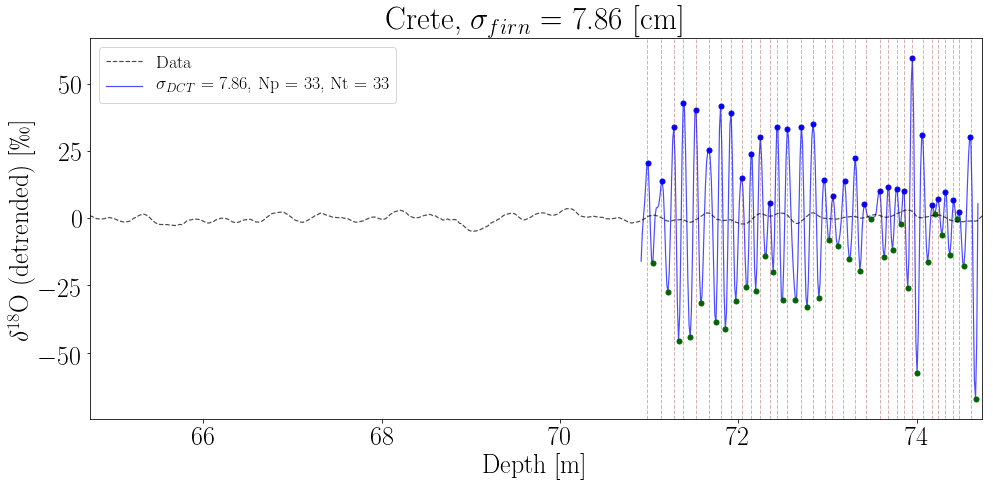

In [19]:
mpl.rcParams['font.size'] = 26

fig, ax = plt.subplots(figsize=(16,7))

plt.plot(np.asarray(depth_LT), np.asarray(d18O_LT)-np.mean(np.asarray(d18O_LT)), lw=1.2, label='Data', ls='--', color='k', alpha=0.7)
plt.plot(depthOpt_test, dataOpt_test, label='$\sigma_{DCT}$ = ' + f'{diffLen_test*100:.2f}, Np = {len(peaks_test)}, Nt = {len(troughs_test)}',zorder=-1, color='b', alpha=.7, lw=1.2)
#plt.plot(depthOpt32, dataOpt32, label='$\sigma_{NDCT}$ = ' + f'{diffLen32*100:.2f}, Np = {len(peaks32)}, Nt = {len(troughs)}',zorder=-1, color='b', alpha=.7, lw=1.2)

plt.legend(fontsize=18)
ax.set(xlabel='Depth [m]', ylabel='$\delta^{18}$O (detrended) [\permil]', title=site+', $\sigma_{firn}$ = ' + f'{diffLen_test*100:.2f} [cm]',xlim=(min(depth_LT),max(depth_LT)))
#plt.scatter(depthOpt32[peaks32],dataOpt32[peaks32], color='maroon',zorder=1, s=25)
#plt.scatter(depthOpt32[troughs],dataOpt32[troughs], color='k',zorder=1, s=25)
plt.scatter(depthOpt_test[peaks_test],dataOpt_test[peaks_test], color='b',zorder=1, s=25)
plt.scatter(depthOpt_test[troughs_test],dataOpt_test[troughs_test], color='darkgreen',zorder=1, s=25)
for i in range(len(peaks32)):
    ax.axvline(depthOpt32[peaks32[i]],lw=1,color='maroon',ls='--', alpha=0.3)

for i in range(len(troughs)):
    ax.axvline(depthOpt32[troughs[i]],lw=1,color='k',ls='--', alpha=0.3)
#for i in range(len(peaks_test)):
#    ax.axvline(depthOpt_test[peaks_test[i]],lw=1,color='g',ls='--')

if saveFigs:
    fig.savefig('../../WrittenWork/Figures/'+site+'_TheoDiffLens33Opt_only.png', bbox_inches='tight')


In [ ]:
T = 12
y1 = 1783
m1 = 10

y2 = 1816
m2 = 7



In [ ]:
d1 = y1*12 + m1 - y1*12
d2 = y2*12 + m2 - y1*12

t = np.linspace(d1,d2,int(d2-d1)*100+1)
y = np.sin(2*np.pi*(t+np.pi)/12)
t = t/12 - 1

In [ ]:
from scipy import signal


peaks = sp.signal.find_peaks(y)[0]
troughs = sp.signal.find_peaks(-y)[0]

fig,ax = plt.subplots(figsize=(14,4))
plt.plot(t,y, label='Signal', lw=1.2)
plt.plot(t[peaks],y[peaks],'.',ms=10,color='gray', label=f'Peaks, N = {len(peaks)}')
plt.plot(t[troughs],y[troughs],'.',ms=10, color='k', label=f'Troughs, N = {len(troughs)}')
ax.set(xlim=(min(t)-0.1,max(t)+0.1), xlabel='Time [years]')
ax.legend(fontsize=18, loc='right');

if saveFigs:
    fig.savefig('../../WrittenWork/Figures/LakiToTambora_EstTime.eps', bbox_inches='tight')

